### 必要モジュールのインポート

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_fontja

### データの前処理と概要

In [19]:
df = pd.read_csv("./boat-race.csv")
df = df[["枠番","年齢","体重","平均ST","全国-勝率","全国-2連率","全国-3連率","当地-勝率","当地-2連率","当地-3連率","モーター-2連率","モーター-3連率","単勝オッズ","レーサーid","着順"]]
df.head()

,枠番,年齢,体重,平均ST,全国-勝率,全国-2連率,全国-3連率,当地-勝率,当地-2連率,当地-3連率,モーター-2連率,モーター-3連率,単勝オッズ,レーサーid,着順
0,1,23,52.0,0.15,5.67,37.14,57.86,0.00,0.00,0.00,35.98,51.83,2.0,4746,1
1,2,29,46.5,0.17,6.13,46.67,60.00,5.13,25.00,50.00,33.17,54.15,3.6,4886,4
2,3,26,52.0,0.15,6.11,49.41,57.65,5.83,38.89,66.67,29.01,43.21,5.5,4959,3
3,4,27,52.0,0.11,5.78,39.17,60.00,6.69,54.29,71.43,30.57,43.31,4.5,4960,2
4,5,28,45.0,0.14,5.48,36.56,52.69,4.00,12.50,25.00,39.74,53.21,9.5,4933,6


In [5]:
df = df.dropna(axis=0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2493 entries, 0 to 2519
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   枠番        2493 non-null   int64  
 1   年齢        2493 non-null   int64  
 2   体重        2493 non-null   float64
 3   平均ST      2493 non-null   float64
 4   全国-勝率     2493 non-null   float64
 5   全国-2連率    2493 non-null   float64
 6   全国-3連率    2493 non-null   float64
 7   当地-勝率     2493 non-null   float64
 8   当地-2連率    2493 non-null   float64
 9   当地-3連率    2493 non-null   float64
 10  モーター-2連率  2493 non-null   float64
 11  モーター-3連率  2493 non-null   float64
 12  単勝オッズ     2493 non-null   float64
 13  レーサーid    2493 non-null   int64  
 14  着順        2493 non-null   int64  
dtypes: float64(11), int64(4)
memory usage: 311.6 KB


In [7]:
df.describe()

,枠番,年齢,体重,平均ST,全国-勝率,全国-2連率,全国-3連率,当地-勝率,当地-2連率,当地-3連率,モーター-2連率,モーター-3連率,単勝オッズ,レーサーid,着順
count,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000
mean,3.491777,38.334136,50.652948,0.152379,6.231288,42.502495,59.736968,5.556249,37.932118,52.853341,35.301982,51.927978,12.012635,4368.952667,3.502206
std,1.706973,8.936477,2.771989,0.024777,1.197732,12.488407,13.669387,2.361054,20.590916,25.189403,8.856849,9.851759,13.892308,497.449181,1.710749
min,1.000000,19.000000,43.500000,0.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3024.000000,1.000000
25%,2.000000,32.000000,47.900000,0.140000,5.660000,36.840000,54.650000,5.000000,27.120000,43.480000,30.480000,46.850000,4.300000,4013.000000,2.000000
50%,3.000000,38.000000,52.000000,0.150000,6.530000,44.630000,63.040000,6.250000,41.380000,60.000000,34.810000,51.760000,8.200000,4397.000000,4.000000
75%,5.000000,45.000000,52.200000,0.170000,7.030000,50.770000,68.000000,7.060000,51.720000,70.000000,39.690000,57.140000,14.900000,4758.000000,5.000000
max,6.000000,63.000000,63.200000,0.270000,8.700000,72.900000,86.260000,10.000000,100.000000,100.000000,100.000000,100.000000,177.000000,5360.000000,6.000000


### 箱ひげ図とヒストグラム

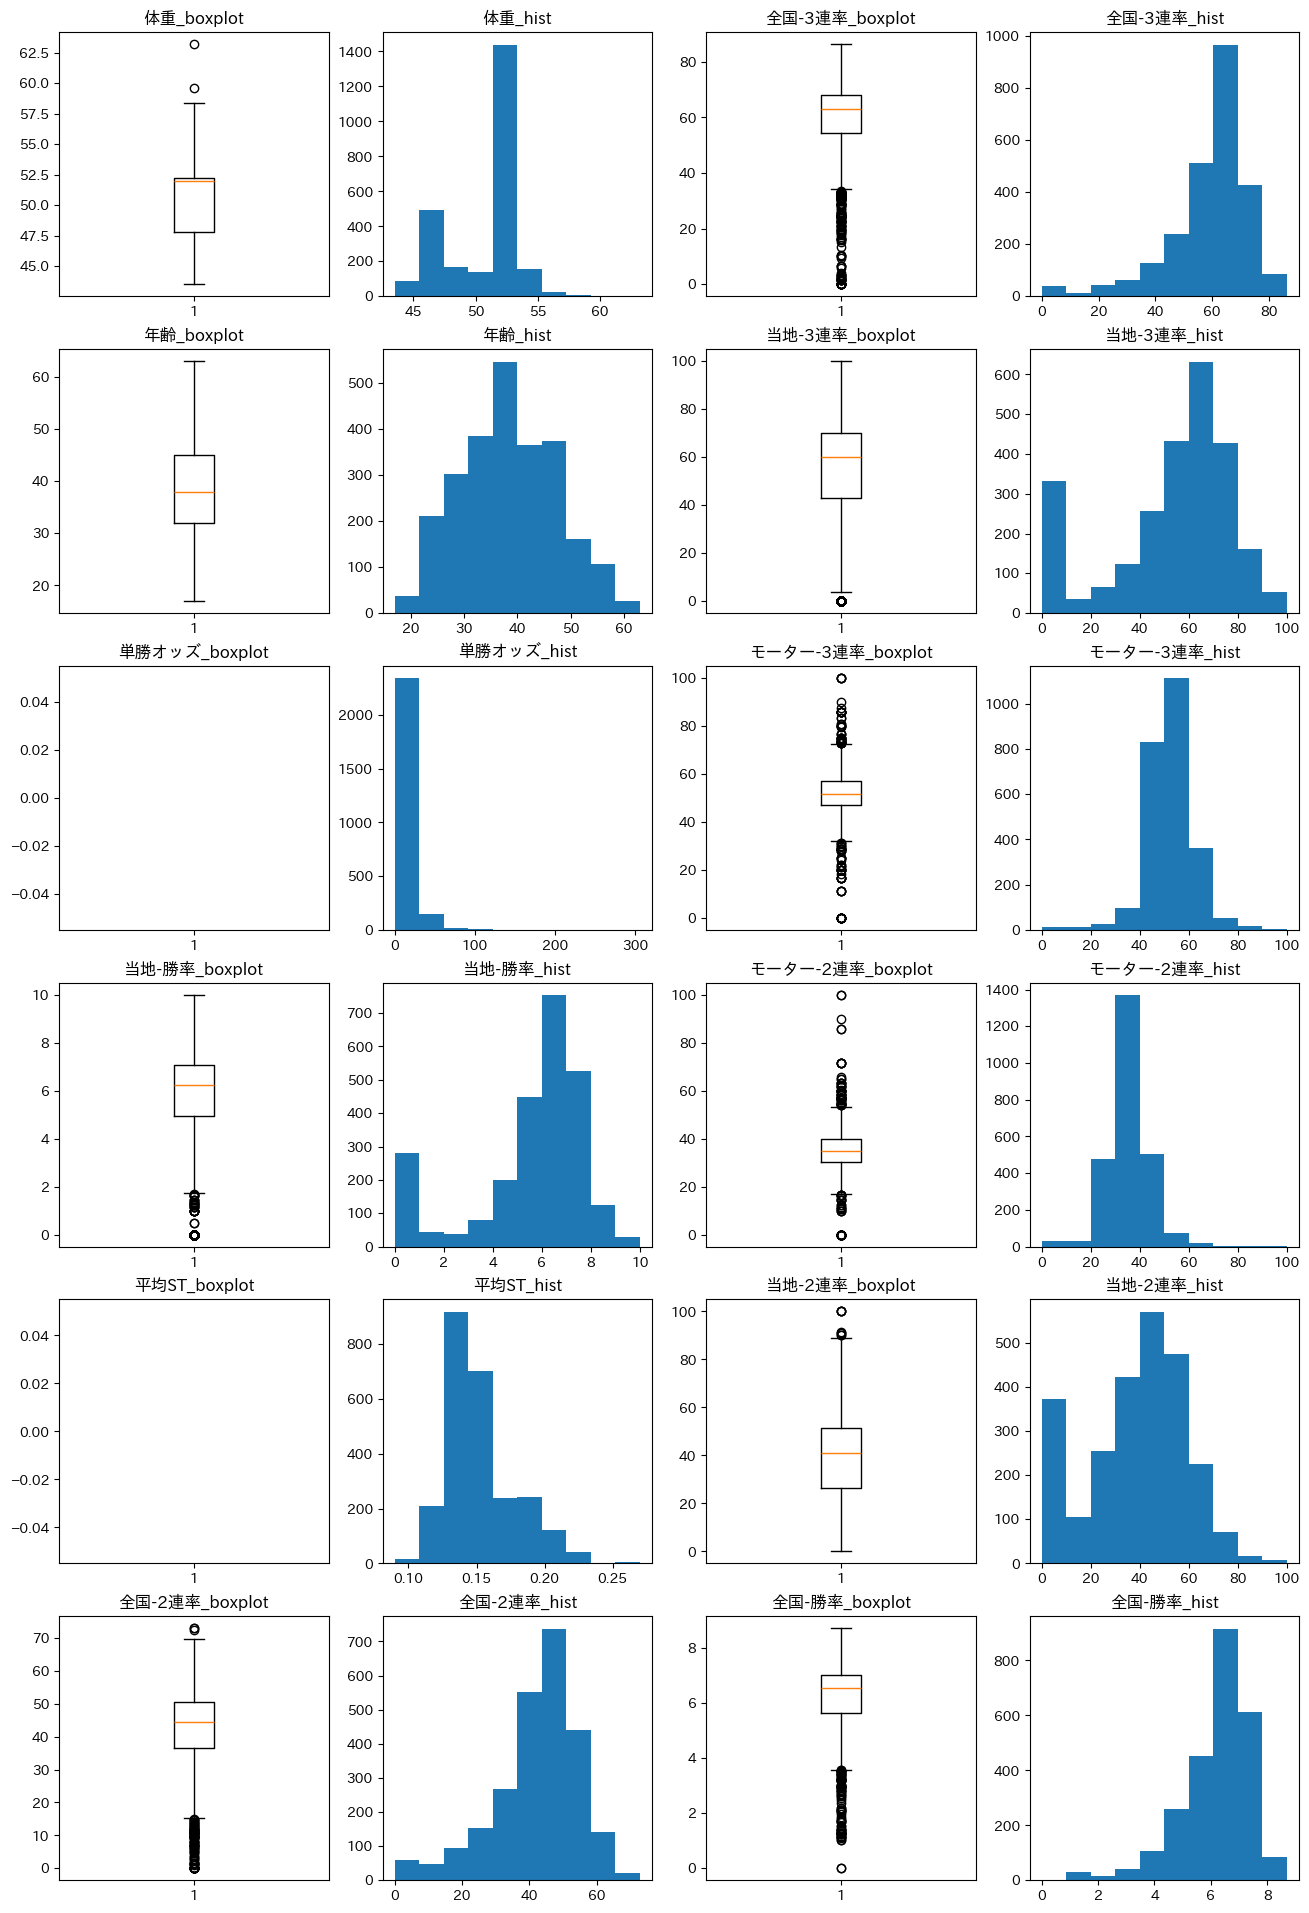

In [20]:
# 枠番と着順とレーサーidは見る意味がないので除く
columns_to_exclude = {"枠番", "着順", "レーサーid"}
columns_to_plot_set = set(df.columns) - columns_to_exclude
columns_to_plot = list(columns_to_plot_set)

fig, ax = plt.subplots(
    (len(columns_to_plot) // 2),
    2*2,
    figsize=(2*2*4, (len(columns_to_plot) // 2)*4)
    )
for i, col in enumerate(columns_to_plot):
# --- 配置位置の計算 ---
    row = i // 2         # 行番号
    col_idx = (i % 2) * 2  # 列番号（左側なら0、右側なら2）

    # --- 作図 ---
    
    # 箱ひげ図
    ax[row, col_idx].boxplot(df[col])
    ax[row, col_idx].set_title(f"{col}_boxplot")

    # ヒストグラム
    ax[row, col_idx + 1].hist(df[col])
    ax[row, col_idx + 1].set_title(f"{col}_hist")

### 相関係数と共分散行列

In [ ]:
print(f"共分散行列\n{df.cov()}")

In [ ]:
correlation_matrix = df.corr()

# 描画設定
plt.figure(figsize=(8, 6))

sns.heatmap(
    correlation_matrix,
    annot=True,         # Trueにすると、各セルに相関係数の値を表示
    fmt=".2f",          # 表示する相関係数の小数点以下の桁数を指定
    cmap="coolwarm",    # カラーマップの指定（正負で色分けされるため、coolwarmが定番）
    vmin=-1,            # 最小値を-1に固定
    vmax=1,             # 最大値を1に固定
    linewidths=.5,      # セルの境界線の太さ
    cbar_kws={"shrink": .8} # カラーバーのサイズ調整
)

plt.title('相関ヒートマップ')
plt.show()

### 偏相関係数

In [14]:
class PartialCorrelation:
    def __init__(self, df: pd.DataFrame):
        self.corr_df = df.corr()
    
    def calc_partial_correlation(self, x: str, y: str, z: str) -> np.float32:
        """
        カラムxの影響を排除したカラムy, カラムzの偏相関係数を計算する
        """
        r_xy = self.corr_df.at[x, y]
        r_xz = self.corr_df.at[x, z]
        r_yz = self.corr_df.at[y, z]

        # 偏相関係数の計算式
        numerator = r_yz - (r_xy * r_xz)
        denominator = np.sqrt(1 - r_xy**2) * np.sqrt(1 - r_xz**2)

        # 分母が0になる場合（完全相関がある場合など）のゼロ除算対策
        if denominator == 0:
            return np.nan
            
        return numerator / denominator

In [15]:
pc = PartialCorrelation(df)
corr_series = pd.Series()
for col in columns_to_plot:
    corr = pc.calc_partial_correlation("枠番", "着順", col)
    corr_series.loc[col] = corr

corr_series = corr_series.sort_values(ascending=False)
corr_series

単勝オッズ       0.031542
体重         -0.000148
年齢         -0.003721
モーター-3連率   -0.012611
モーター-2連率   -0.014555
当地-勝率      -0.020518
当地-3連率     -0.020537
全国-2連率     -0.021444
当地-2連率     -0.021821
全国-3連率     -0.021990
全国-勝率      -0.023674
平均ST       -0.031444
dtype: float64

### 散布図

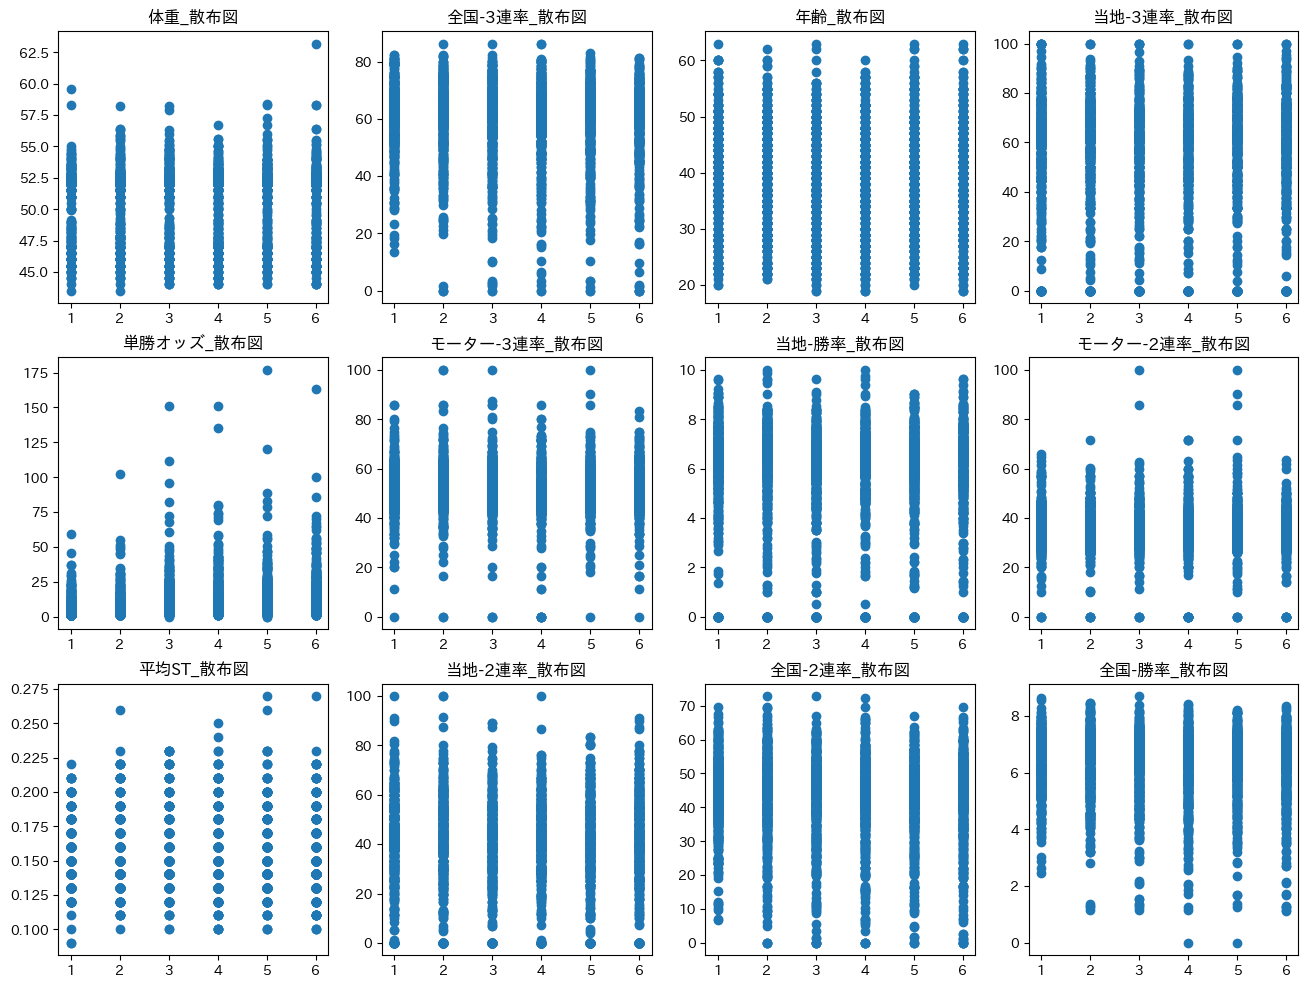

In [17]:
fig, ax = plt.subplots(3, 4, figsize=(16, 12))

for i, col in enumerate(columns_to_plot):
    r = i // 4
    c = i % 4
    ax[r, c].scatter(df["着順"], df[col])
    ax[r, c].set_title(f"{col}_散布図")

### 変数の追加

In [21]:
df["競艇場の相性"] = (df["当地-勝率"] + df["当地-2連率"] + df["当地-3連率"]) - (df["全国-勝率"] + df["全国-2連率"] + df["全国-3連率"])
pc = PartialCorrelation(df)
corr_series = pd.Series()
for col in columns_to_plot:
    corr = pc.calc_partial_correlation("枠番", "競艇場の相性", col)
    corr_series.loc[col] = corr

corr_series = corr_series.sort_values(ascending=False)
corr_series

当地-3連率      0.806059
当地-2連率      0.791520
当地-勝率       0.769845
年齢          0.074326
モーター-3連率    0.055346
モーター-2連率    0.031945
体重          0.019834
単勝オッズ       0.011196
平均ST       -0.041188
全国-勝率      -0.054071
全国-3連率     -0.084530
全国-2連率     -0.098479
dtype: float64

### スピアマンの順位相関係数

<Axes: >

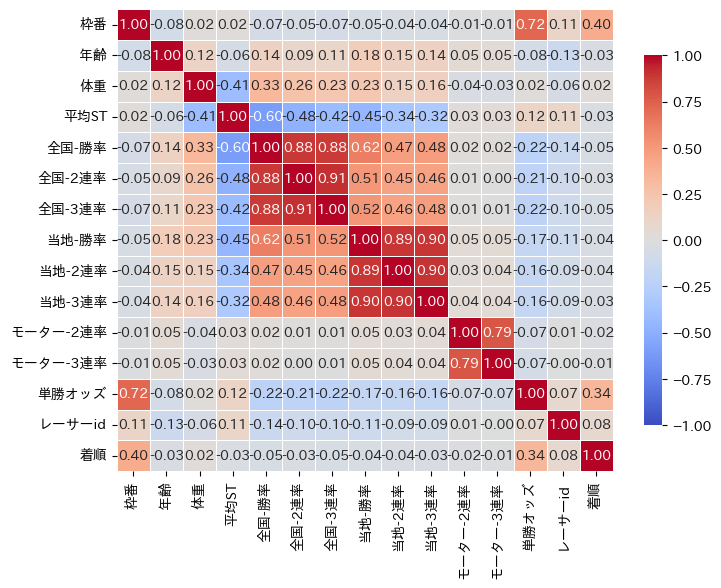

In [22]:
df = df.drop(columns=["競艇場の相性"])
corr_matrix = df.corr(method="spearman")

# 描画設定
plt.figure(figsize=(8, 6))

sns.heatmap(
    corr_matrix,
    annot=True,         # Trueにすると、各セルに相関係数の値を表示
    fmt=".2f",          # 表示する相関係数の小数点以下の桁数を指定
    cmap="coolwarm",    # カラーマップの指定（正負で色分けされるため、coolwarmが定番）
    vmin=-1,            # 最小値を-1に固定
    vmax=1,             # 最大値を1に固定
    linewidths=.5,      # セルの境界線の太さ
    cbar_kws={"shrink": .8} # カラーバーのサイズ調整
)